In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
#Understanding the top rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Getting the schema of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Checking if there are any null values in the dataset
df.isnull().values.any()

False

<h1>Data Visualization and Exploratory Analysis</h1>

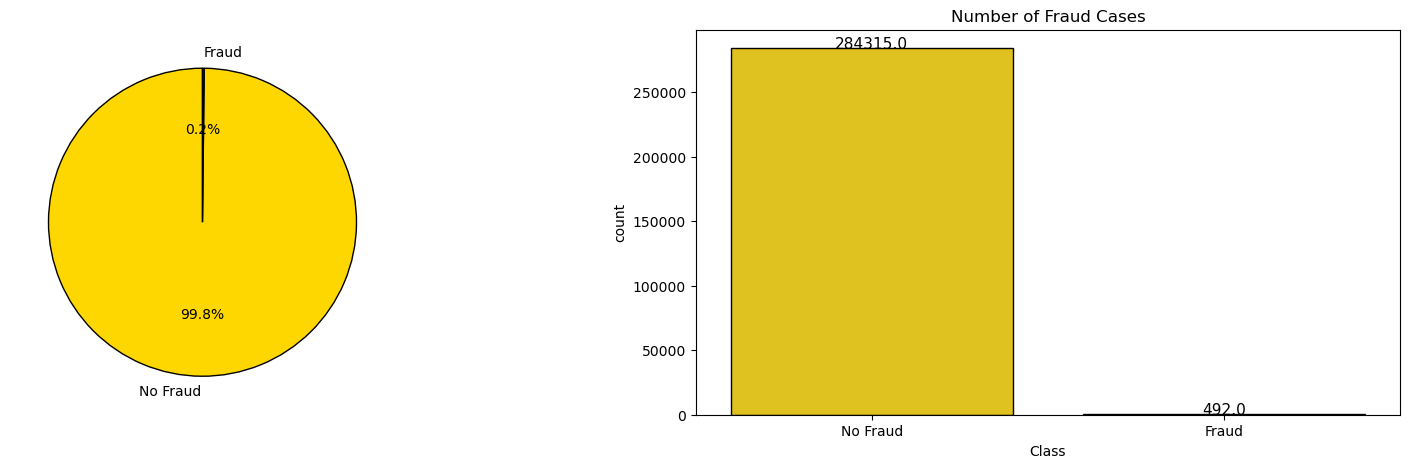

In [6]:
colors = ['#FFD700', '#3B3B3C']

Fraud = len(df[df['Class'] == 1]) / len(df) * 100
No_Fraud = len(df[df['Class'] == 0]) / len(df) * 100
fraud_percentage = [No_Fraud, Fraud]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.pie(fraud_percentage, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

plt.subplot(1, 2, 2)
# Correctly calling sns.countplot with the x parameter
ax = sns.countplot(x='Class', data=df, edgecolor='black', palette=colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, str(rect.get_height()), ha='center', fontsize=11)
ax.set_xticklabels(['No Fraud', 'Fraud'])
plt.title('Number of Fraud Cases')

plt.show()

In [7]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [8]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

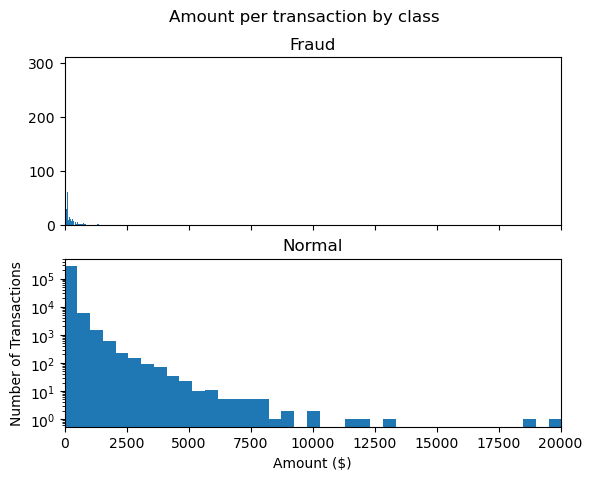

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

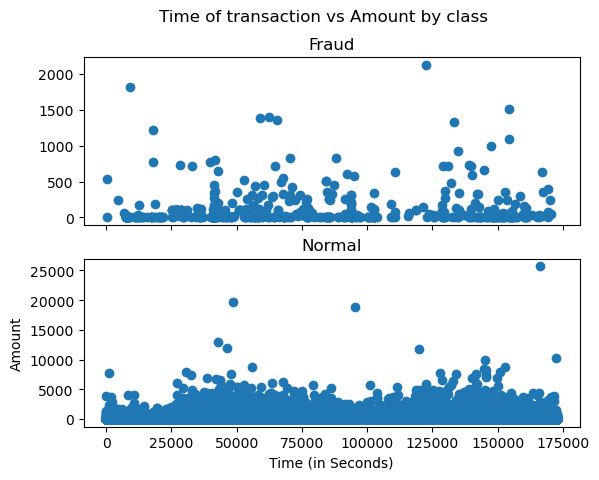

In [12]:
# Checking if fraudulent transactions occur more often during certain time frame 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<h1>Data Sampling and Correlation Analysis</h1>

In [13]:
## Taking some sample of the data

df1= df.sample(frac = 0.1,random_state=1)

df1.shape

(28481, 31)

In [14]:
df.shape

(284807, 31)

In [15]:
#Determining the number of fraud and valid transactions in the dataset

Fraud = df1[df1['Class']==1]

Valid = df1[df1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [16]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


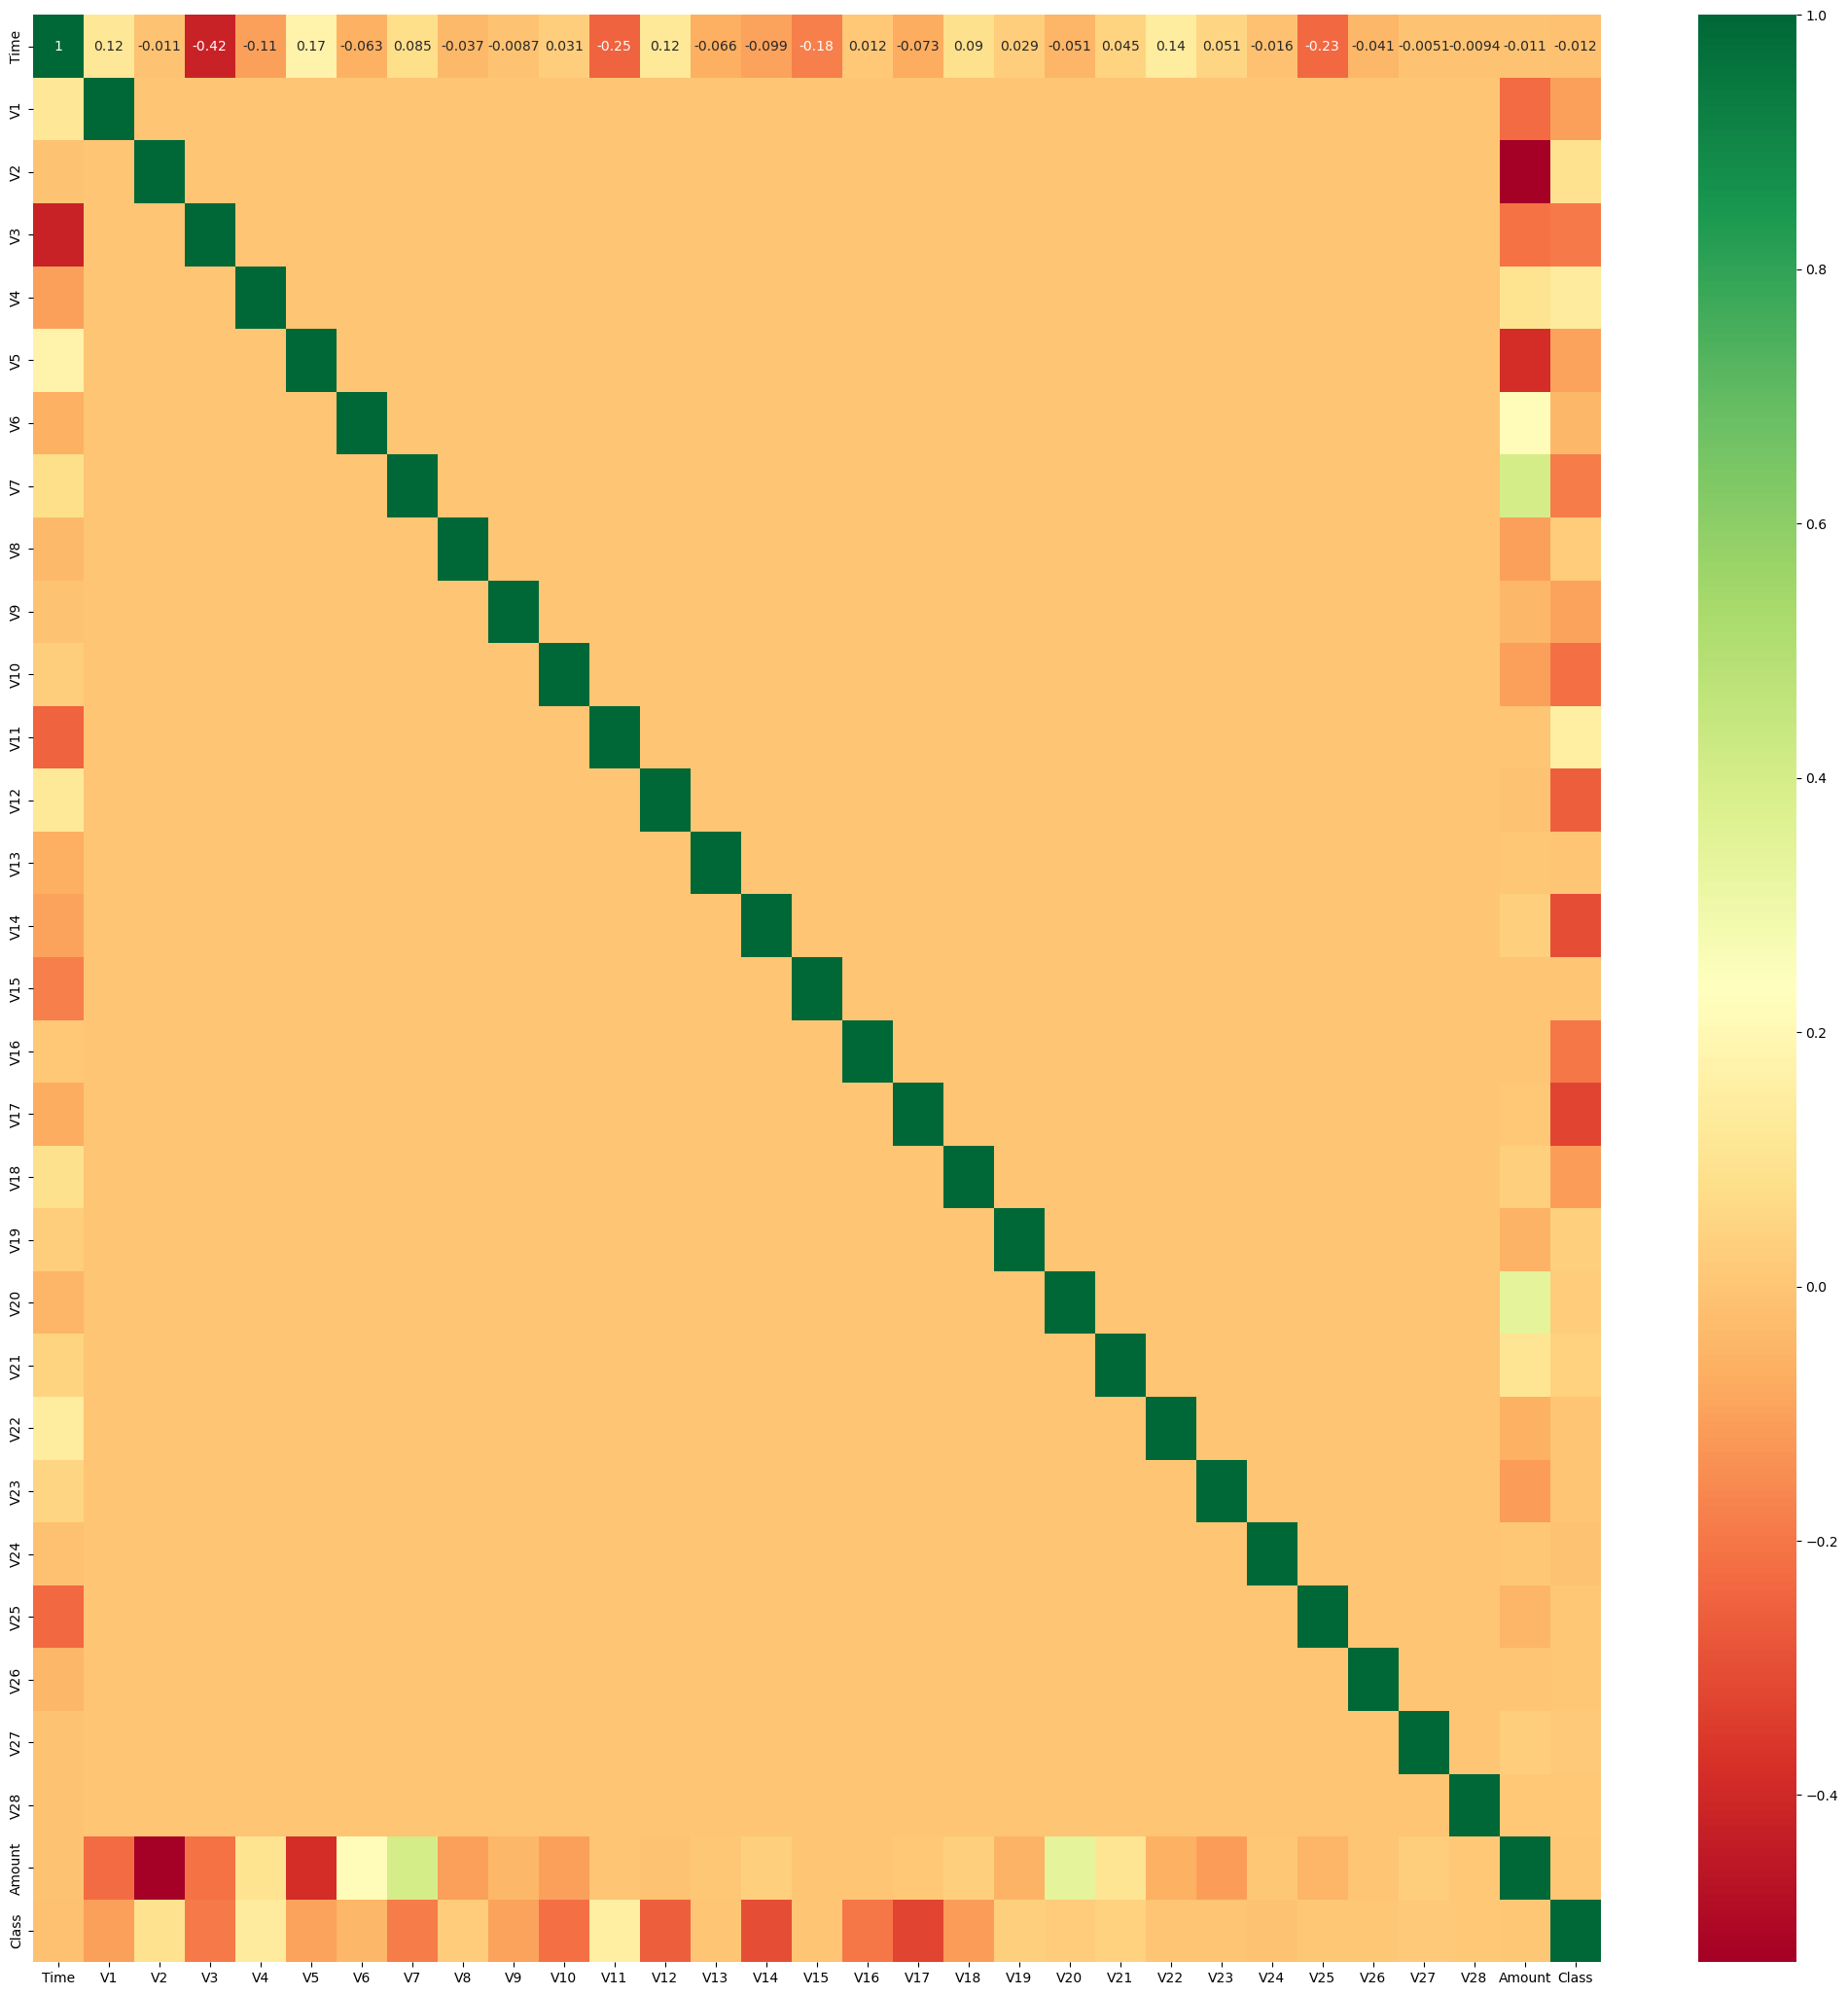

In [17]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(26,26))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
#Create independent and Dependent Features
columns = df1.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we are predicting 
target = "Class"

# Define a random state 
state = np.random.RandomState(42)
X = df1[columns]
Y = df1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


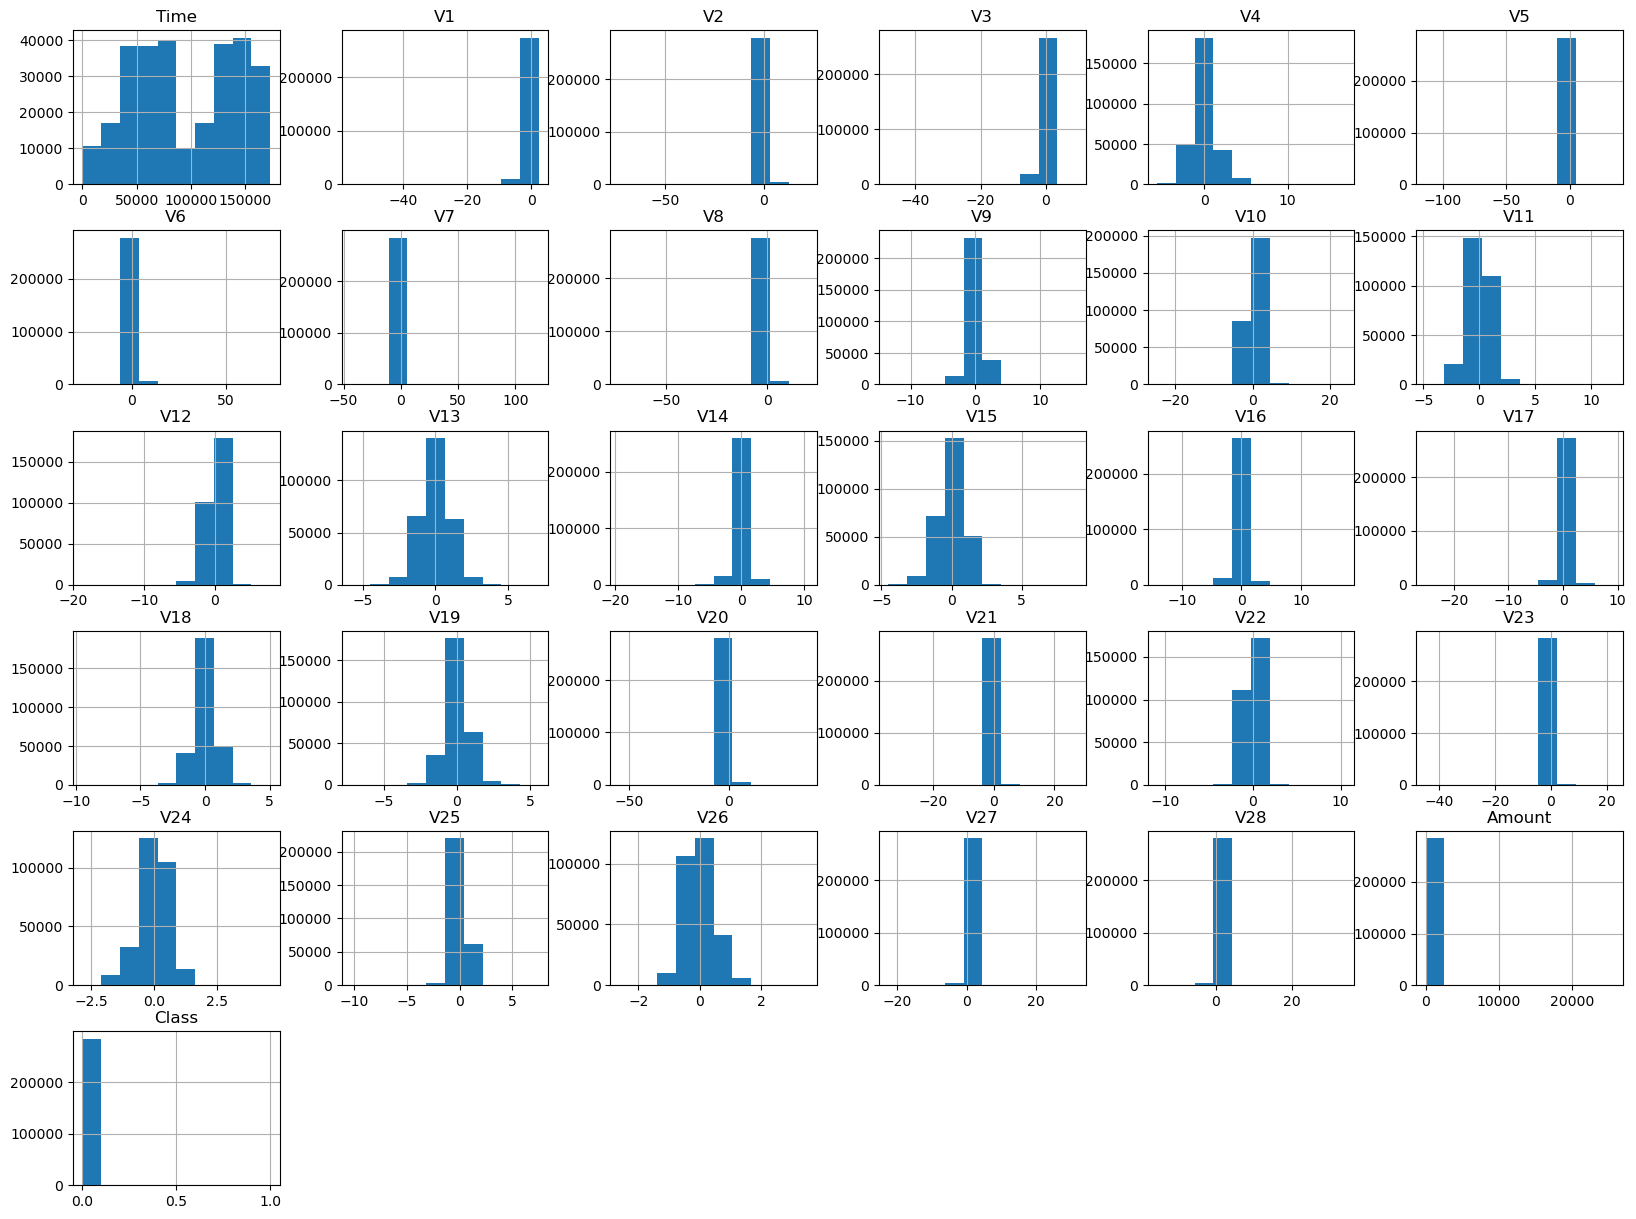

In [19]:
# Plot histograms for each numerical attribute
df.hist(figsize=(20, 15))
plt.show()


<h2>Bivariate Analysis</h2>

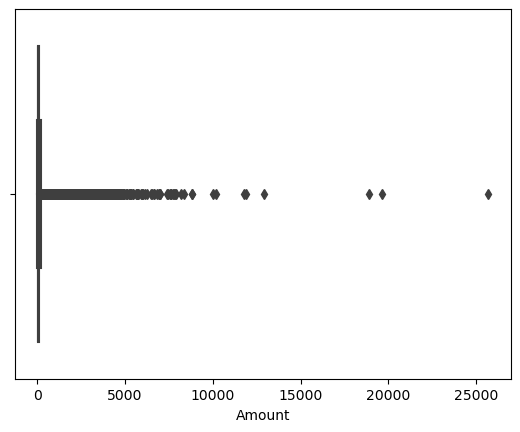

In [20]:
# Box plots to check for outliers in the 'Amount' variable
sns.boxplot(x=df['Amount'])
plt.show()


C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


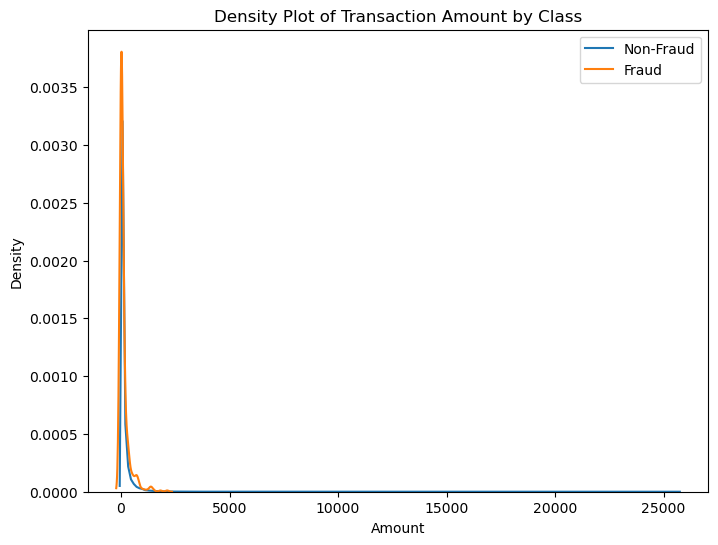

In [21]:
# KDE plot of 'Amount' for each class
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Non-Fraud')
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud')
plt.title('Density Plot of Transaction Amount by Class')
plt.xlabel('Amount')
plt.legend()
plt.show()


C:\Users\swadh\AppData\Local\Temp\ipykernel_8276\3028048997.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\AppData\Local\Temp\ipykernel_8276\3028048997.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
s

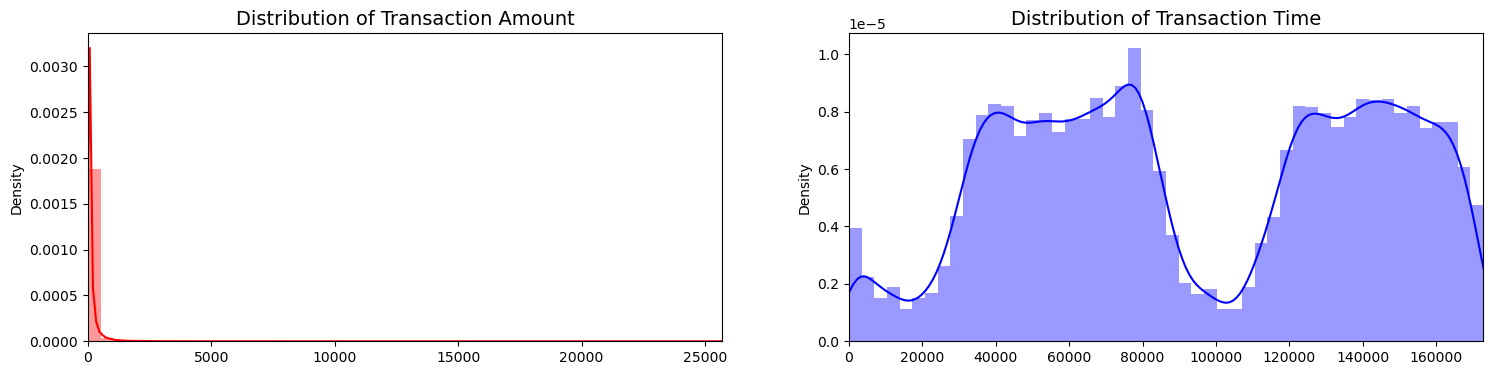

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

<h1>Data Preprocessing for Model Training</h1>

In [23]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [24]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [27]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
105223,0.094320,-0.179443,-0.524594,0.440264,1.273417,0.058734,0.225943,0.381714,0.274906,0.347082,...,0.095593,0.066515,0.446706,-0.017202,-0.261545,-0.553062,0.310214,0.400412,0.225916,0
153885,-0.296793,0.185728,-6.985267,5.151094,-4.599338,4.534479,0.849054,-0.210701,-4.425230,-5.134525,...,-1.246996,5.453672,-2.056177,-0.280334,0.120771,0.569358,0.145971,0.300193,1.779364,1
255433,1.348005,0.852113,1.808899,-0.535677,-1.229932,0.573830,-0.271321,-0.348188,-0.397583,-0.032774,...,0.028804,0.229703,0.657018,-0.125639,-0.852122,-0.000029,-0.098922,0.030314,-0.001515,0
212516,-0.307273,0.636779,-1.298443,1.948100,-4.509947,1.305805,-0.019486,-0.509238,-2.643398,1.283545,...,0.250415,1.178032,1.360989,-0.272013,-0.325948,0.290703,0.841295,0.643094,0.201156,1
58422,2.607140,-0.426603,-2.790771,-1.464269,1.031165,1.921356,-0.090014,-0.483871,0.780731,-0.348776,...,-1.376721,-0.392667,0.440020,0.777659,0.418552,0.244563,-0.159361,0.060540,0.356958,1


In [28]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


C:\Users\swadh\AppData\Local\Temp\ipykernel_8276\3538466111.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\AppData\Local\Temp\ipykernel_8276\3538466111.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-leve

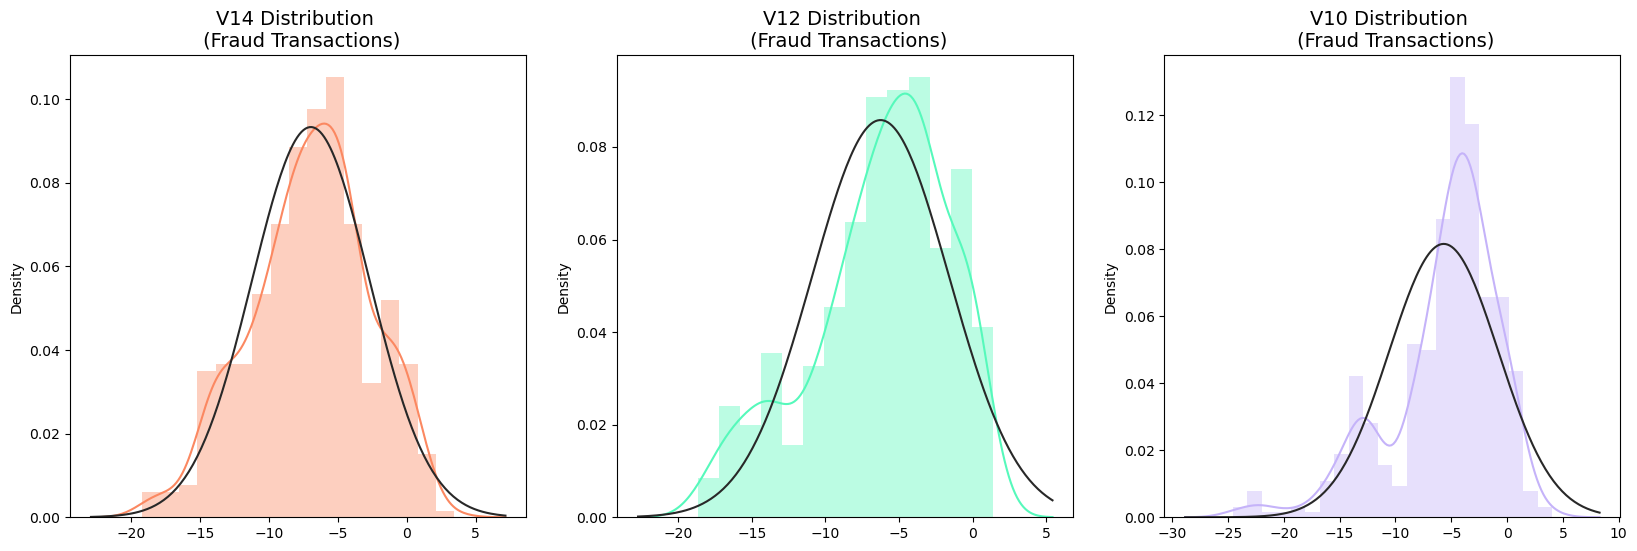

In [29]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

<h2>Outlier Detection and Removal Process</h2>

<ol><li>Outlier Detection:

<ul><li>Percentiles and Interquartile Range (IQR): For each feature (V14, V12, V10), the code calculates the 25th (Q1) and 75th (Q3) percentiles. The Interquartile Range (IQR) is determined by subtracting Q1 from Q3.</li>

<li>Outlier Thresholds: Outliers are defined as observations that fall below 
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR or above 
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR. This method is based on the Tukey's method for identifying outliers.</li>

<li>Identification: Outliers are identified by applying these thresholds, and their counts are printed for each feature.</li></li></ul>
<li>Removing Outliers:</li>

<ul><li>Using the calculated lower and upper bounds for each feature, rows in the dataframe (new_df) that contain outlier values are dropped. This is done to ensure that these extreme values do not affect the overall analysis and model performance.</li></ul></ol>

In [30]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.0499976898594, -18.4937733551053, -19.2143254902614, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.0475965708216, -18.4311310279993, -18.6837146333443]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.2318333653018, -15.239961

<ul><li>Integrity of Data: Removing outliers ensures that the models trained on this data are not unduly influenced by extreme, rare, or anomalous cases that do not represent the general trend.</li>

<li>Model Accuracy: By refining the dataset in this manner, predictive models are more likely to generalize better when deployed, rather than overfitting to noise or outliers in the training dataset.</li>

<li>Transparency: Documenting the process of how outliers are handled provides clarity and justification for subsequent analytical conclusions, enhancing the credibility of the analysis.</li></ul>

This outlier detection and removal process is crucial for preparing a clean and representative dataset, particularly in domains like fraud detection where precision is paramount. By systematically identifying and removing outliers, the dataset's quality is enhanced, thereby supporting more reliable and robust analytical outcomes.

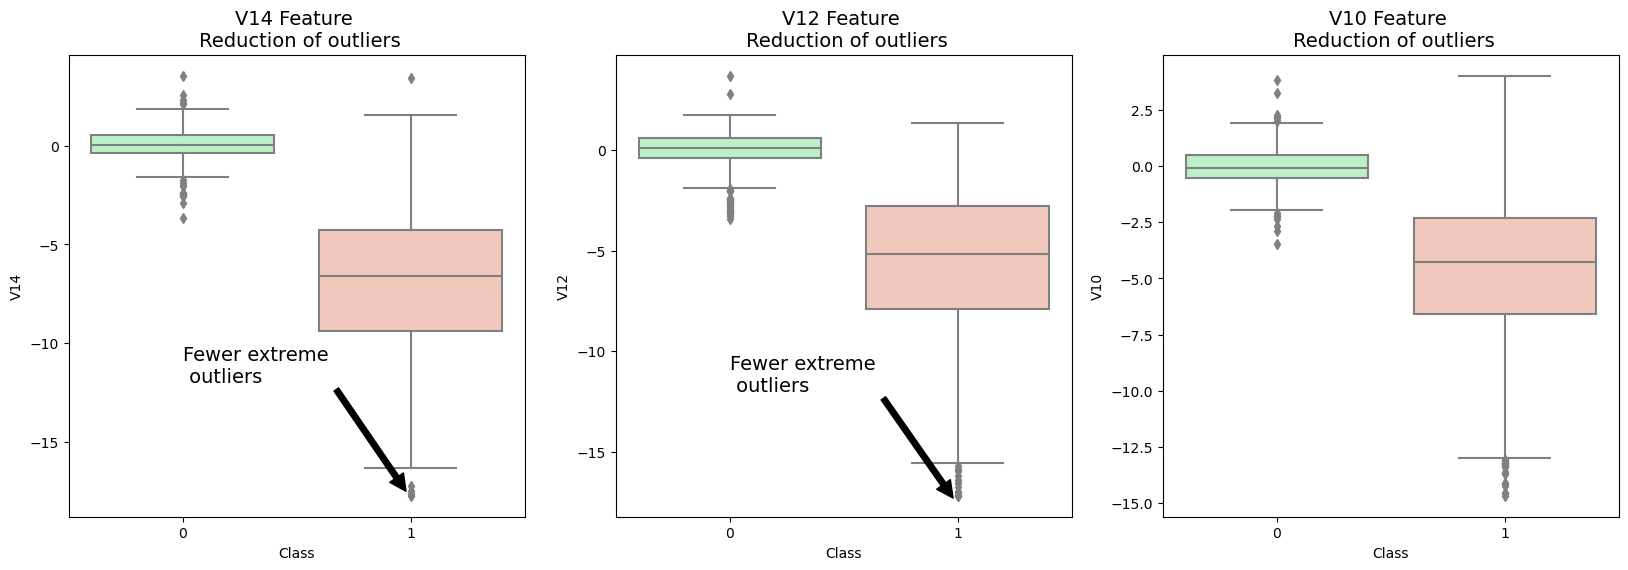

In [31]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [32]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import time

<h2>Dimensionality Reduction Techniques</h2>

Purpose: t-SNE is particularly well-suited for the visualization of high-dimensional datasets. It works by converting similarities between data points to joint probabilities and trying to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

In [33]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 4.6 s


Purpose: PCA reduces dimensionality by transforming the original variables into a new set of variables (principal components), which are orthogonal and most expressive (in terms of explained variance).

In [34]:
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.056 s


Purpose: This technique is similar to PCA but works on sample matrices directly rather than their covariance matrices. It is often used with sparse datasets.

In [35]:
# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

Truncated SVD took 0.033 s


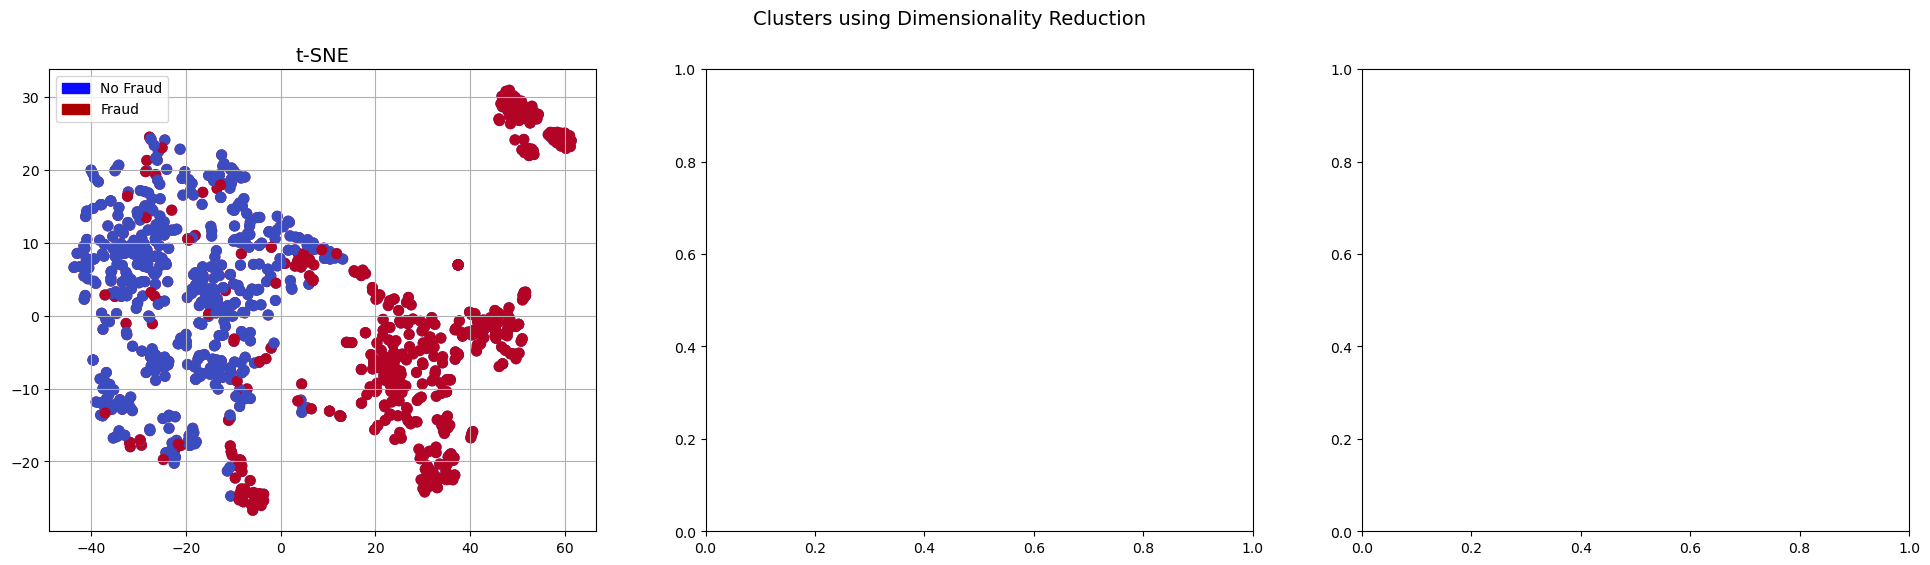

In [36]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


In [37]:
# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])


In [38]:
#TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Documenting the application of these techniques along with their visualization helps in both exploratory data analysis and in making informed choices about which dimensionality reduction method to apply in predictive modeling, especially in scenarios like fraud detection where understanding data structure and distribution is key to effective model training.

In [39]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [40]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [42]:
#Importing all the libraries needed for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [43]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [44]:
# Applying Cross-validation
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [45]:
# Using GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

C:\Users\swadh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\swadh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [46]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

C:\Users\swadh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\swadh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Cross Validation Score:  94.29%
Knears Neighbors Cross Validation Score 93.76%
Support Vector Classifier Cross Validation Score 94.29%
DecisionTree Classifier Cross Validation Score 93.09%


In [47]:
!pip install imbalanced-learn



<h1>Model Training and Evaluation</h1>

NearMiss was employed as part of a strategy to handle the highly imbalanced dataset related to credit card fraud detection. In this dataset, fraudulent transactions (the minority class) are often vastly outnumbered by legitimate transactions (the majority class). 

<h2><b>Context:</b></h2>
<li><b>Mitigate Model Bias:</b></li> Machine learning models trained on imbalanced datasets tend to be biased towards the majority class. This bias can lead to poor classification performance, particularly in failing to correctly identify instances of the minority class, which in cases like fraud detection is often more critical to detect accurately. By using NearMiss, your code aims to reduce this bias by undersampling the majority class to balance the class distribution before model training.

<li><b>Improving Classification Accuracy for Minority Class:</b></li> By ensuring that the number of examples in both classes are roughly equal, NearMiss helps to enhance the model’s sensitivity towards the minority class—this can lead to a higher detection rate of fraudulent transactions.

<li><b>Computational Efficiency:</b></li> Training on significantly reduced data can speed up the learning process, which is beneficial especially when dealing with large datasets. By using NearMiss, your training dataset becomes smaller and more manageable, thus speeding up computations.

<li><b>Pipeline Creation:</b></li> NearMiss is used within a pipeline that includes logistic regression. This ensures that undersampling is applied during the training phase of each cross-validation fold, avoiding information leakage from the test fold into the training process.

<li><b>Cross-Validation:</b></li> It's applied within each fold of the cross-validation, ensuring that each training fold is balanced independently. This approach helps in evaluating the model's performance more reliably by mitigating the impact of class imbalance within each fold.

In [48]:
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score



# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56589  56705  56964 ... 284804 284805 284806] Test: [    0     1     2 ... 56961 56962 56963]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56589  56705  56964 ... 113927 113928 113929]
Train: [     0      1      2 ... 284804 284805 284806] Test: [109252 110006 110784 ... 170894 170895 170896]
Train: [     0      1      2 ... 284804 284805 284806] Test: [166305 166401 167376 ... 227846 227847 227848]
Train: [     0      1      2 ... 227846 227847 227848] Test: [227070 227478 227843 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


C:\Users\swadh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\swadh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

<i>plot_learning_curve</i> function is particularly useful for comparing different models to see how effectively they learn from the data as more data is provided. For example, high bias models will show poor performance on the training set which doesn't improve much with more data, while high variance models will show great performance on the training set but poor generalization to new data (unless more data is provided.

By plotting learning curves for several models side by side, one can visually assess which model might be underfitting or overfitting, and how adding more data affects performance.

<h2>Practical Implications:</h2>
<h3>Bias-Variance Tradeoff:</h3> Understanding where your model stands in terms of bias and variance can help in selecting the right model complexity and the amount of data needed for training.
<h3>Model Selection and Tuning:</h3> Learning curves can guide the process of model selection and hyperparameter tuning by illustrating how changes to parameters or the addition of data influence model performance.

In [49]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

The <i>plot_learning_curve</i> function is a comprehensive tool for model evaluation in a machine learning workflow. It helps in understanding the learning dynamics of different models, guiding critical decisions regarding model selection, training, and potential needs for more data or reconfiguration of model parameters.

<module 'matplotlib.pyplot' from 'C:\\Users\\swadh\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

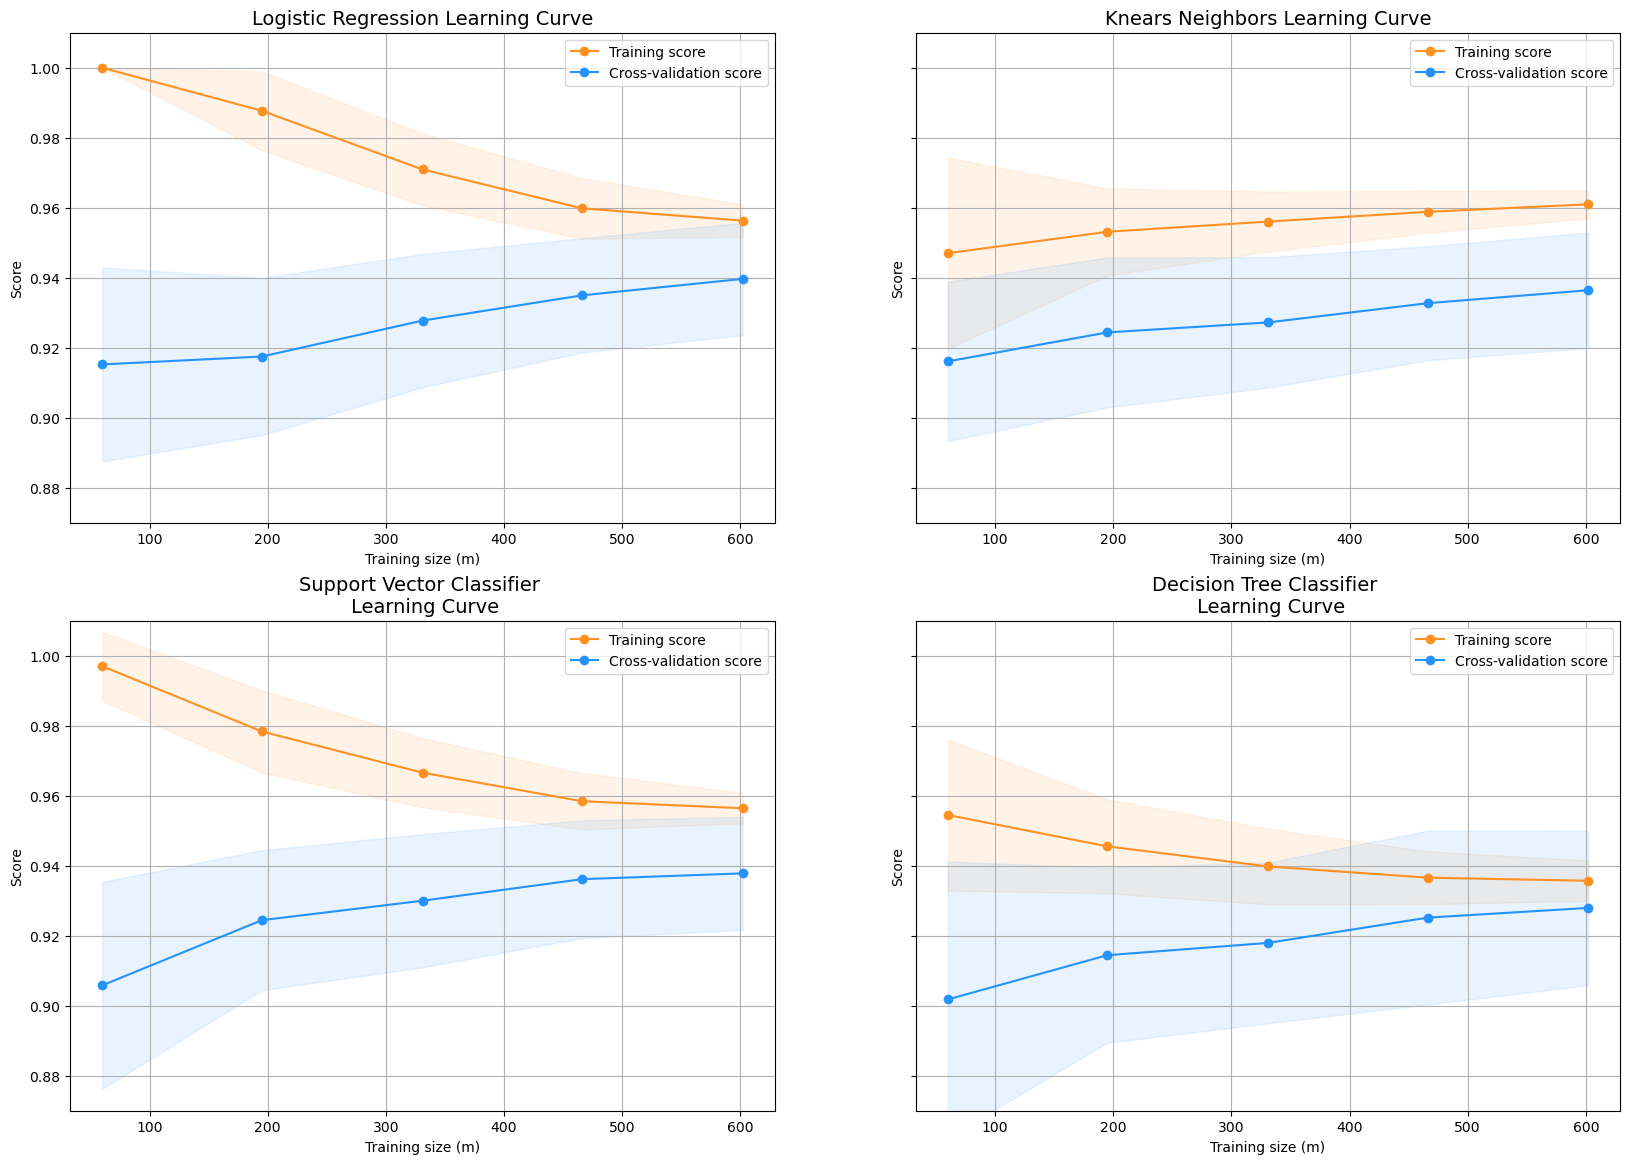

In [50]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

<ol><li>Precision Score</li>
Definition: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of a classifier's exactness. A lower precision can also indicate a large number of False Positives.


Use Case: Precision is a critical measure when the costs of False Positives are high. For instance, in fraud detection, a false positive (non-fraudulent transaction flagged as fraudulent) could mean blocking a legitimate transaction, potentially annoying customers.

<li>Recall Score</li>
Definition: Recall (or Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to all actual positives. It measures a classifier's completeness.
Use Case: Recall becomes important in cases where missing actual positive cases bears a significant cost. In terms of fraud detection, a low recall means more fraudulent transactions slipping through the cracks.

​
 
<li>F1 Score</li>
Definition: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is a measure of a test’s accuracy.

Use Case: The F1 score is especially useful when you need to seek a balance between Precision and Recall AND when there is an uneven class distribution (large number of actual negatives).

<li>ROC-AUC Score</li>
Definition: The Receiver Operating Characteristic (ROC) curve is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
Formula: AUC - ROC is the performance measurement for the classification problems at various threshold settings. ROC is a probability curve, and AUC represents the degree or measure of separability.

Use Case: ROC-AUC score is particularly useful when you need to evaluate a model’s performance without having to specify a classification threshold (useful in imbalanced class problems like fraud detection).</ol>

In [51]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

C:\Users\swadh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\swadh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [52]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9690791058950262
KNears Neighbors:  0.9346749160181996
Support Vector Classifier:  0.97573386628113
Decision Tree Classifier:  0.9275524088956926


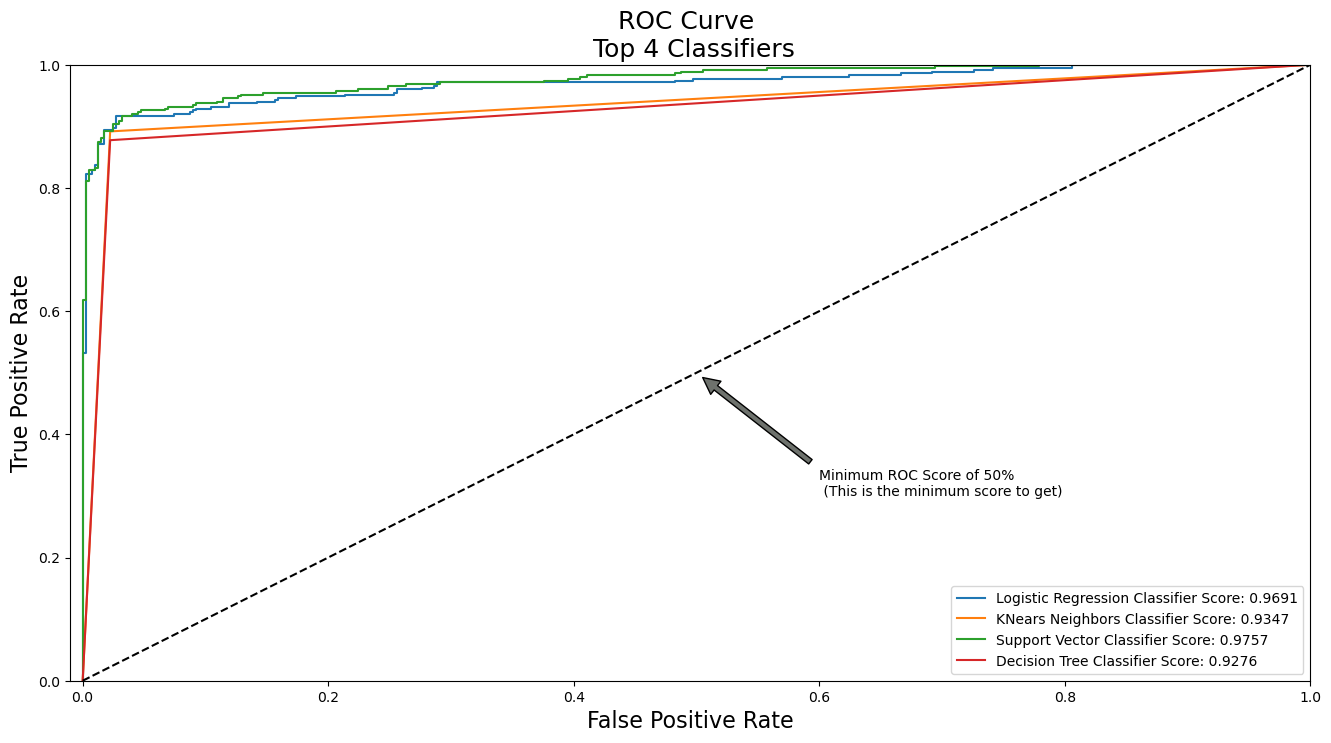

In [53]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

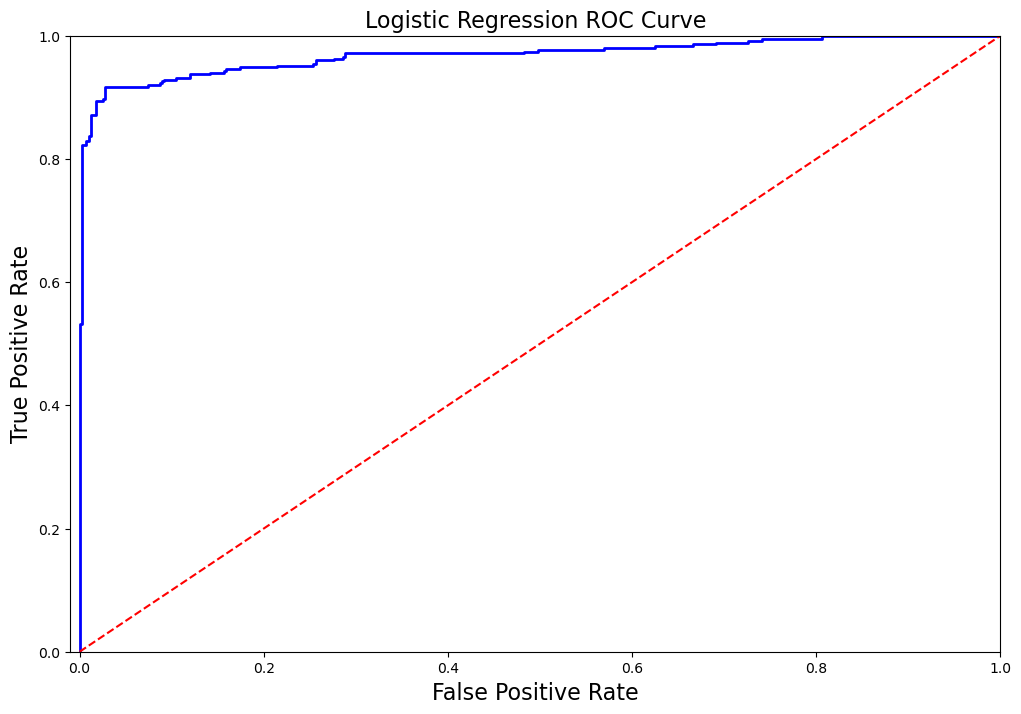

In [54]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [55]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [56]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.95
Precision Score: 0.60
F1 Score: 0.74
Accuracy Score: 0.69
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.52
Precision Score: 0.00
Recall Score: 0.52
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [57]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [58]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.02


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.02')

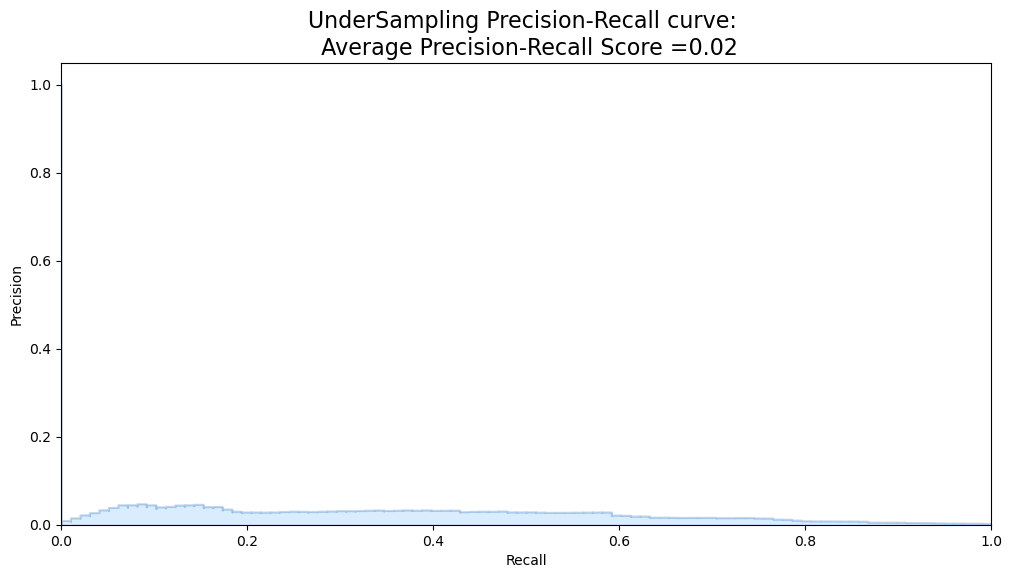

In [59]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [60]:
'''
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)
'''

'\nfrom imblearn.over_sampling import SMOTE\nfrom sklearn.model_selection import train_test_split, RandomizedSearchCV\n\n\nprint(\'Length of X (train): {} | Length of y (train): {}\'.format(len(original_Xtrain), len(original_ytrain)))\nprint(\'Length of X (test): {} | Length of y (test): {}\'.format(len(original_Xtest), len(original_ytest)))\n\n# List to append the score and then find the average\naccuracy_lst = []\nprecision_lst = []\nrecall_lst = []\nf1_lst = []\nauc_lst = []\n\n# Classifier with optimal parameters\n# log_reg_sm = grid_log_reg.best_estimator_\nlog_reg_sm = LogisticRegression()\n\n\n\n\nrand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)\n\n\n# Implementing SMOTE Technique \n# Cross Validating the right way\n# Parameters\nlog_reg_params = {"penalty": [\'l1\', \'l2\'], \'C\': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}\nfor train, test in sss.split(original_Xtrain, original_ytrain):\n    pipeline = make_pipeline(SMOTE(sampling_strategy=\'minorit

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

# Setup parameter grid including a higher max_iter value
log_reg_params = {
    "classifier__penalty": ['l2'],
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "classifier__solver": ['lbfgs'],
    "classifier__max_iter": [1000]  # Increased max_iter
}

# Define the model pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale data to improve convergence
    ('classifier', LogisticRegression())
])

# Setup RandomizedSearchCV
rand_log_reg = RandomizedSearchCV(pipeline, log_reg_params, n_iter=4, cv=5)

# Prepare for cross-validation
sss = StratifiedShuffleSplit(n_splits=5, random_state=0)

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

for train_idx, test_idx in sss.split(original_Xtrain, original_ytrain):
    X_train, y_train = original_Xtrain[train_idx], original_ytrain[train_idx]
    X_test, y_test = original_Xtrain[test_idx], original_ytrain[test_idx]

    # Applying SMOTE to the training data
    smote = SMOTE(sampling_strategy='minority')
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Fitting the model
    rand_log_reg.fit(X_train_smote, y_train_smote)
    best_est = rand_log_reg.best_estimator_

    # Making predictions
    prediction = best_est.predict(X_test)
    
    accuracy_lst.append(best_est.score(X_test, y_test))
    precision_lst.append(precision_score(y_test, prediction))
    recall_lst.append(recall_score(y_test, prediction))
    f1_lst.append(f1_score(y_test, prediction))
    auc_lst.append(roc_auc_score(y_test, prediction))

print('Mean scores:')
print("Accuracy: {}".format(np.mean(accuracy_lst)))
print("Precision: {}".format(np.mean(precision_lst)))
print("Recall: {}".format(np.mean(recall_lst)))
print("F1: {}".format(np.mean(f1_lst)))


Mean scores:
Accuracy: 0.9767478604344964
Precision: 0.0639507925862098
Recall: 0.9230769230769231
F1: 0.11960788674831364


In [62]:
from sklearn.metrics import classification_report

labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.87      0.19        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961



In [63]:
y_score = best_est.decision_function(original_Xtest)

In [64]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.77


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.77')

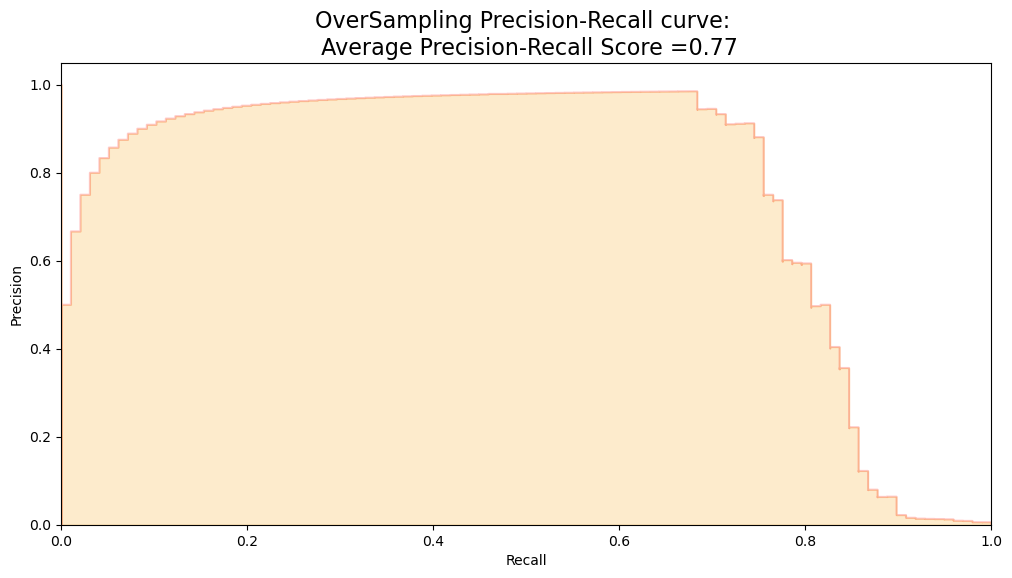

In [65]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

<h1>SMOTE Application and Model Training</h1>

SMOTE is an oversampling technique that generates synthetic samples from the minority class by interpolating between existing instances.
It's used after splitting the data into training and testing sets to prevent information leakage and ensure the model generalizes well to unseen data.

In [66]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

The logistic regression model is trained on the SMOTE-enhanced data.
The time taken for fitting the model is recorded to evaluate the computational cost.

In [67]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :5.34651517868042 sec


Predictions are made on a test set that was not oversampled to evaluate how well the models generalize from the training data.
Different classifiers are used: Logistic Regression, k-Nearest Neighbors (KNN), Support Vector Classifier (SVC), and Decision Tree Classifier.

Confusion matrices are computed for each classifier using confusion_matrix(y_test, y_pred).
These matrices are visualized using sns.heatmap(), providing insights into each model's performance in terms of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
Each matrix is annotated with the counts of each category and visual settings are adjusted for readability.


<li>True Positives (TP): Transactions correctly classified as fraudulent.</li>
<li>True Negatives (TN):Transactions correctly classified as non-fraudulent.</li>
<li>False Positives (FP):Non-fraudulent transactions incorrectly classified as fraudulent.</li>
<li>False Negatives (FN):Fraudulent transactions incorrectly classified as non-fraudulent.</li>
The ideal model minimizes FP and FN while maximizing TP and TN.

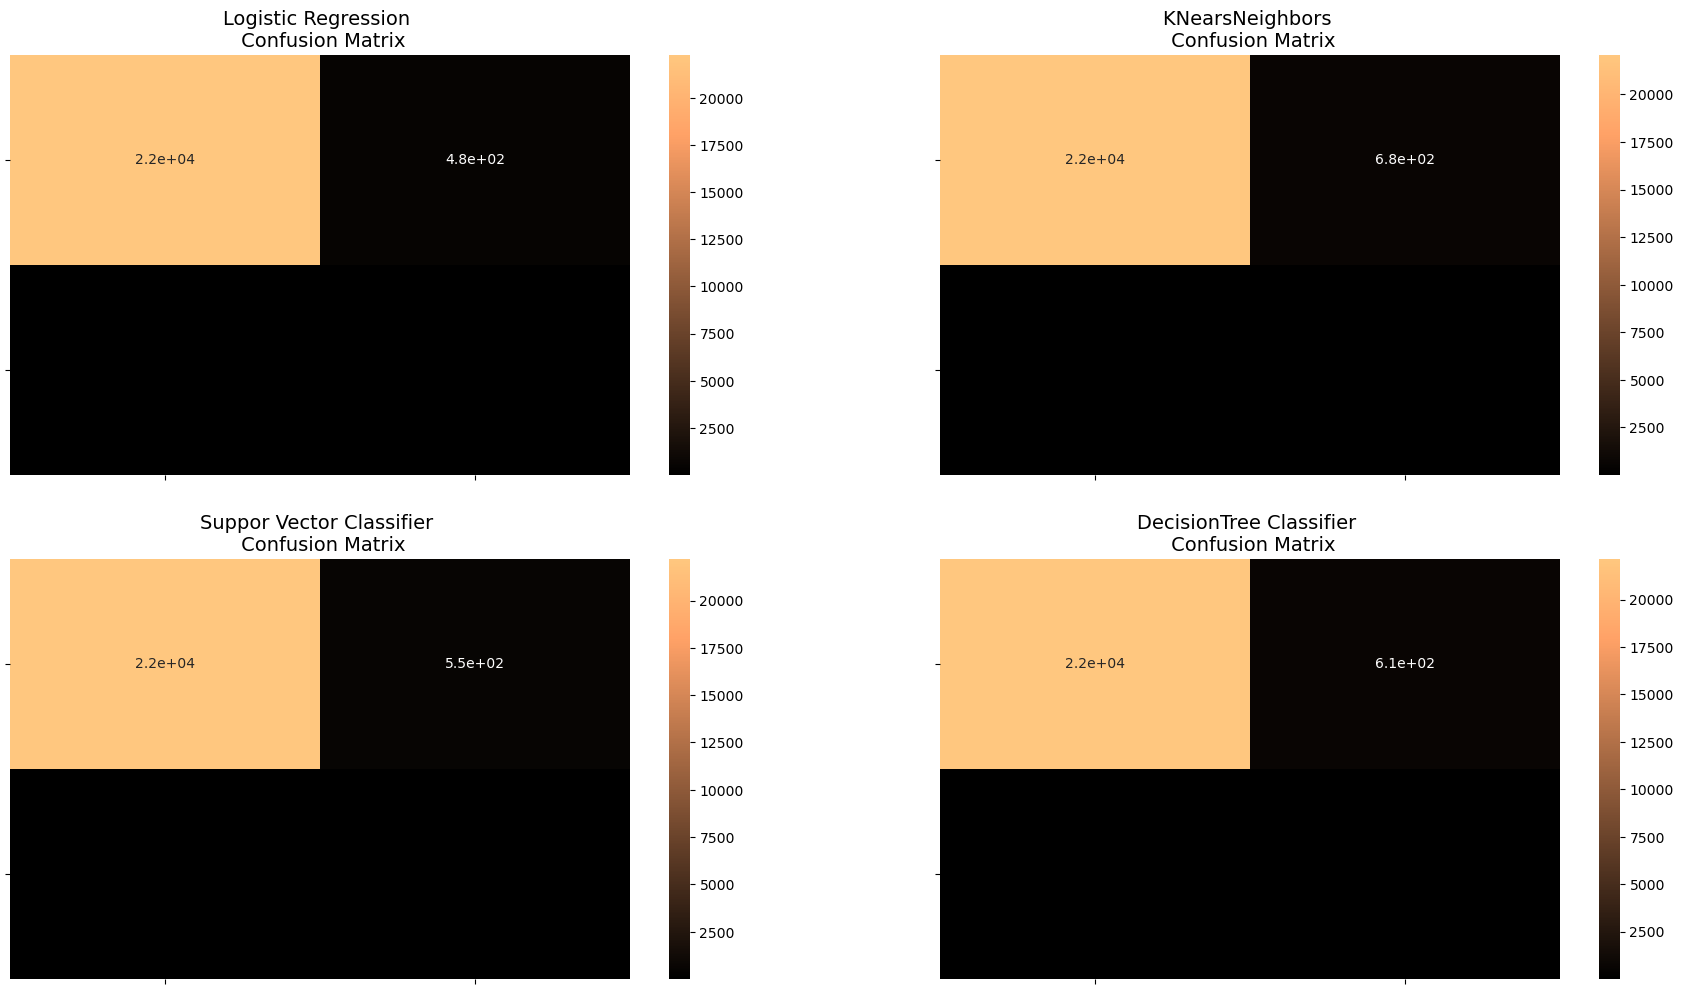

In [68]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

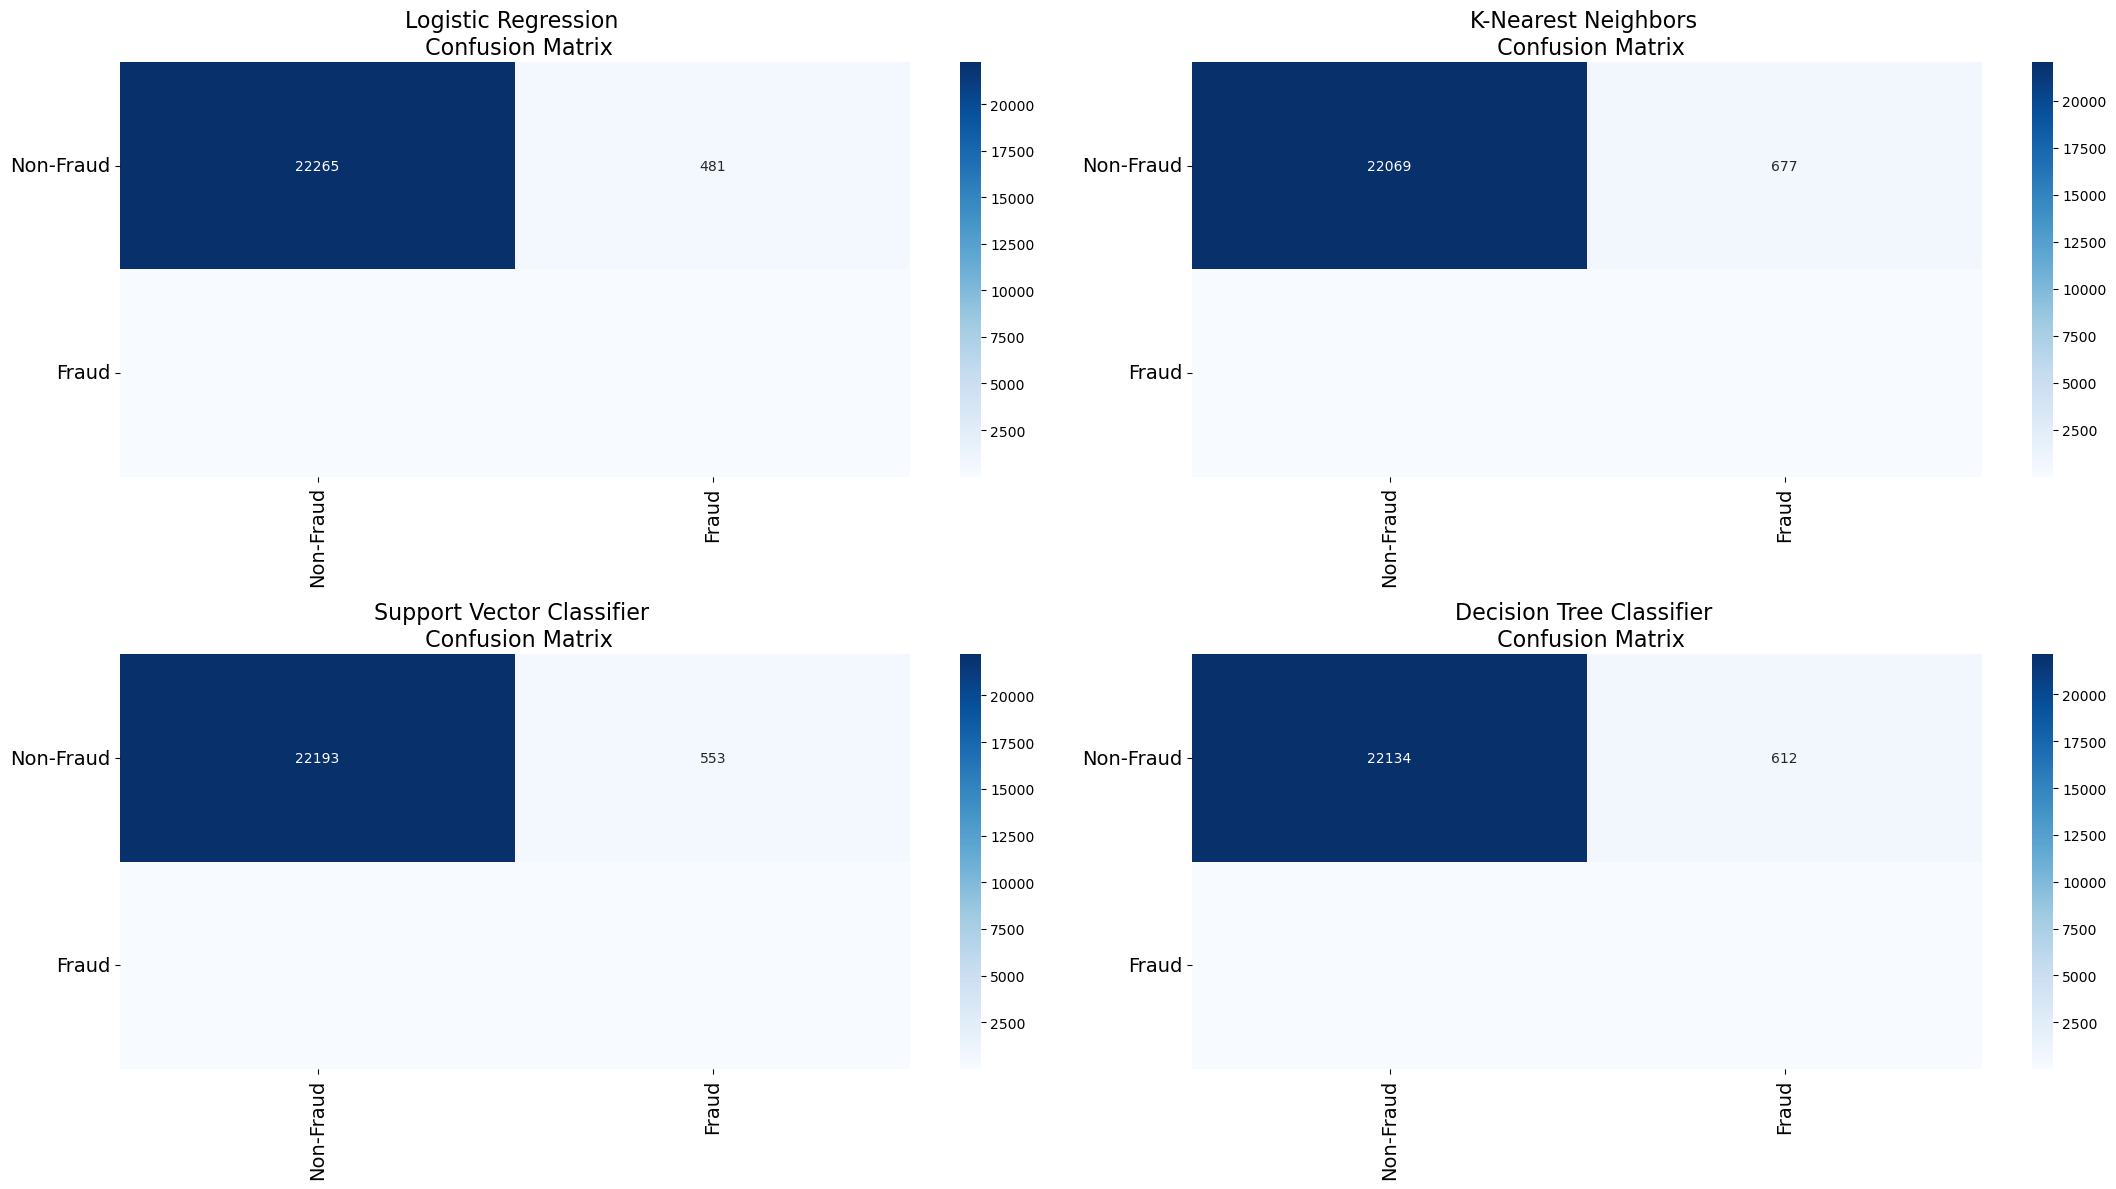

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming logistic regression and other models are already defined and fitted
y_pred_log_reg = log_reg_sm.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2, figsize=(22, 12))

cmap = plt.cm.Blues  # A color map that is visually appealing for confusion matrices

# Logistic Regression
sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=cmap, fmt='g')
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=16)
ax[0, 0].set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['Non-Fraud', 'Fraud'], fontsize=14, rotation=0)

# K-Nearest Neighbors
sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=cmap, fmt='g')
ax[0][1].set_title("K-Nearest Neighbors \n Confusion Matrix", fontsize=16)
ax[0][1].set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['Non-Fraud', 'Fraud'], fontsize=14, rotation=0)

# Support Vector Classifier
sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=cmap, fmt='g')
ax[1][0].set_title("Support Vector Classifier \n Confusion Matrix", fontsize=16)
ax[1][0].set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['Non-Fraud', 'Fraud'], fontsize=14, rotation=0)

# Decision Tree Classifier
sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=cmap, fmt='g')
ax[1][1].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=16)
ax[1][1].set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['Non-Fraud', 'Fraud'], fontsize=14, rotation=0)

plt.tight_layout()
plt.show()


In [70]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22746
           1       0.07      0.95      0.13        39

    accuracy                           0.98     22785
   macro avg       0.54      0.96      0.56     22785
weighted avg       1.00      0.98      0.99     22785

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     22746
           1       0.05      0.95      0.10        39

    accuracy                           0.97     22785
   macro avg       0.53      0.96      0.54     22785
weighted avg       1.00      0.97      0.98     22785

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22746
           1       0.06      0.92      0.11        39

    accuracy                           0.98     22785
   macro avg       0.53      0.95      0.55     22785
weighted

In [71]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.978802
1,Oversampling (SMOTE),0.987395


In [72]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.metrics import categorical_crossentropy
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

C:\Users\swadh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
undersample_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
#Model Compilation
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Optimizer: The model uses the Adam optimizer, a popular choice for deep learning applications due to its efficient computation and low memory requirement. The learning rate is set to 0.001, which determines how much the model's weights are updated during training.

Loss Function: sparse_categorical_crossentropy is used as the loss function, suitable for multi-class classification problems where the target classes are provided as integers (a common scenario when data has been undersampled to address class imbalance).

Metrics: Accuracy is used as the metric for evaluating the model. This metric provides a straightforward interpretation of model performance — the fraction of predictions the model got right.


In [75]:
#Model Training
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
6562/6562 - 19s - 3ms/step - accuracy: 0.9971 - loss: 0.0111 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 2/20
6562/6562 - 19s - 3ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9992 - val_loss: 0.0042
Epoch 3/20
6562/6562 - 28s - 4ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 4/20
6562/6562 - 15s - 2ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 5/20
6562/6562 - 20s - 3ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 6/20
6562/6562 - 16s - 2ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9992 - val_loss: 0.0041
Epoch 7/20
6562/6562 - 21s - 3ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9990 - val_loss: 0.0048
Epoch 8/20
6562/6562 - 17s - 3ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9992 - val_loss: 0.0047
Epoch 9/20
6562/6562 - 20s - 3ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 

Training Data: The model is trained using X_train and y_train, which are expected to be the features and labels from the undersampled dataset.

Validation Split: 20% of the training data is used as a validation set. Using a portion of the training data for validation helps in monitoring the model's performance on unseen data, preventing overfitting.

Batch Size: The training is performed in batches of 25. Batch size affects the accuracy of the estimate of the error gradient when training neural networks.

Epochs: The model is set to run for 20 epochs, meaning the entire training dataset will be passed forward and backward through the neural network 20 times.

Shuffling: Data is shuffled before each epoch to prevent any order effects that might impact the learning process.

Verbosity: Set to 2, which means one line per epoch will be printed to show the training progress.

In [76]:
#Model Prediction
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

Testing Data: Predictions are made on original_Xtest, which likely represents the original (non-undersampled) test dataset. This approach tests how well the model, trained on the undersampled data, performs against a balanced or differently distributed dataset.

Batch Size for Predictions: Set to 200, which is the number of samples that will be processed at once during the prediction phase.
Verbosity for Predictions: Set to 0, meaning that the prediction process will run silently without printing any output to the console.

In [77]:
undersample_fraud_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [78]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [79]:
#Model Setup
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

Input Dimension: n_inputs is determined by the number of features in Xsm_train, ensuring that the input layer matches the shape of the data.

<b>Network Architecture:</b>

First Layer: A dense layer with n_inputs neurons, using ReLU (Rectified Linear Unit) as the activation function. This layer serves as the input layer.

Second Layer: Another dense layer with 32 neurons, also using ReLU activation. This is a hidden layer designed to capture more complex patterns in the data.

Output Layer: A dense layer with 2 neurons and a softmax activation function, suitable for binary classification tasks. The softmax function outputs probabilities of the class membership.

In [80]:
#Model Compilation
oversample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Optimizer: Uses Adam, an adaptive learning rate optimizer, with a learning rate of 0.001. Adam is favored for its efficiency in handling sparse gradients and non-stationary objectives, which are common in deep learning tasks.

Loss Function: sparse_categorical_crossentropy is appropriate for binary and multi-class classification problems where the labels are integers.

Metrics: Accuracy is tracked to evaluate the model's performance during training and testing.


In [81]:
#Model Training
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 17s - 14ms/step - accuracy: 0.9693 - loss: 0.0760 - val_accuracy: 0.9916 - val_loss: 0.0226
Epoch 2/20
1214/1214 - 7s - 5ms/step - accuracy: 0.9959 - loss: 0.0160 - val_accuracy: 0.9994 - val_loss: 0.0105
Epoch 3/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9982 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 4/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9999 - val_loss: 0.0055
Epoch 5/20
1214/1214 - 9s - 8ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/20
1214/1214 - 8s - 7ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9999 - val_loss: 0.0019
Epoch 7/20
1214/1214 - 11s - 9ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9997 - val_loss: 0.0037
Epoch 8/20
1214/1214 - 9s - 8ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 9/20
1214/1214 - 14s - 11ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 1.00

Training Data: The model is trained on Xsm_train and ysm_train, which have been balanced using SMOTE.

Validation Split: 20% of the training data is held back for validation purposes to monitor the model's performance and guard against overfitting.

Batch Size: Set to 300, determining the number of samples processed before the model's internal parameters are updated.

Epochs: The model runs through the full dataset 20 times, allowing the optimizer to adjust the weights to minimize the loss gradually.

Shuffle: Shuffling the order of the dataset helps to prevent cycles or patterns that might lead to biased learning.

Verbosity: Set to 2 for more verbose output about the training process, which includes one line per epoch.

In [82]:
#Model Prediction
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

Prediction on Test Data: The model makes predictions on original_Xtest, which is the original test dataset not influenced by SMOTE, to evaluate how well the model generalizes from the oversampled training data.

Batch Size for Predictions: The predictions are processed in batches of 200.

Verbosity for Predictions: Set to 0 for silent operation, which means no log output will be produced during predictions.

In [83]:
oversample_fraud_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

<h1>Conclusion</h1>

Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions). Nevertheless, I still have to state that sometimes the neural network on the oversampled dataset predicts less correct fraud transactions than our model using the undersample dataset. However, remember that the removal of outliers was implemented only on the random undersample dataset and not on the oversampled one. Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. Imagine that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution. The number of customer complaints and customer disatisfaction will increase. The next step of this analysis will be to do an outlier removal on our oversample dataset and see if our accuracy in the test set improves.